# Performance comparison of the different sorting algorithms

In this notebook, we're analazing the performance of the sorting algorithms we implemented earlier: bubblesort, merge sort, fusion sort, quick sort, insertion sort, selection sort. We plot the time of execution.

In [1]:
import timeit
import numpy as np
import matplotlib.pyplot as plt
import random

We can import the desired function too, but in order to apply some modifications I decided to re-write them in this notebook as they are pretty simple.

In [2]:
def InsertionSort(array):
    """
        Sorts an array using the insertion sort algorithm
        Input: array, 1D
        Output; the same array, sorted
    """
    cpt = 0
    for ind, elt in enumerate(array):
        i = ind -1
        while i >= 0 and array[i]>elt:
            cpt+=1
            array[i+1] = array[i]
            i-=1
        array[i+1] = elt

    return array

In [3]:
def Bubblesort(array):
    """
        Sorts an array using the bublesort algorithm
        Input: array, 1D
        Output: the same array, sorted
    """
    n = len(array)
    cpt = 0
    for i in range(n-1):
        for j in range(n-1, i, -1):
            if array[j] < array[j-1]:
                cpt +=2
                array[j-1], array[j] = array[j], array[j-1]
    return array

Now we are ready to plot the time complexity: time of execution in fonction of the length of the list to sort. For comparaison, we also plot the time complexity of the sort() method already implemented in Python. We will perform this benchmark using random lists, from size 1 to 1000 and one list per size. We will use the built-in module timeit, which create a virutal environment where it computes the time of execution of a given number of calls to the function (defaut is 1e6 but since we have quadratic function we choose 1000).

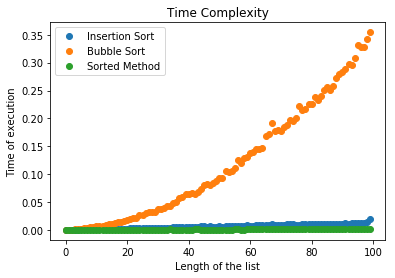

In [4]:
# Timeit makes it hard for funtions with arguments so we use a wrapper

def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped


# Choose the max value inside a list
MaxValue = 1000

def PlotTimeComplexity(MaxSize):
    
    # Initialize the vector of time execution
    y_insertion =[]
    y_bubble = []
    y_sort = []

    # Create the x axis
    x = [i for i in range(MaxSize)]

    # Let's compare our algorithms ! First create the lists
    for i in range(MaxSize):
        l = [random.randint(0, MaxValue) for j in range(i)]
        wrapped1 = wrapper(InsertionSort, l)
        t1 = timeit.timeit(wrapped1, number=1000)
        wrapped2 = wrapper(Bubblesort, l)
        t2 = timeit.timeit(wrapped2, number=1000)
        wrapped3 = wrapper(sorted, l)
        t3 = timeit.timeit(wrapped3, number=1000)
        y_insertion.append(t1)
        y_bubble.append(t2)
        y_sort.append(t3)

    # Now we can plot 

    plt.plot(x, y_insertion, 'o')
    plt.plot(x, y_bubble, 'o')
    plt.plot(x, y_sort, 'o')
    plt.legend(('Insertion Sort', 'Bubble Sort', 'Sorted Method'),loc='upper left')
    plt.title('Time Complexity')
    plt.xlabel('Length of the list')
    plt.ylabel('Time of execution')
    plt.show()
    
PlotTimeComplexity(100)
    


As we can see, Bubble sort is very inefficient, even for relatively small list compared to the insertion sort and the sorted method. Let's try with longer lists to see the difference between the sorted method and the insertion sort.

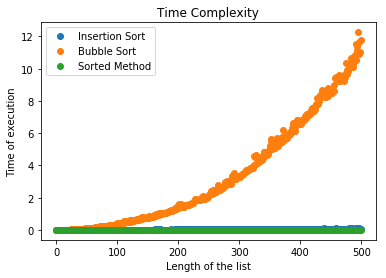

In [5]:
PlotTimeComplexity(500)

The results are pretty clear.